In [1]:
# Testing GPU Availability

!nvidia-smi

Fri Mar 22 23:31:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.07             Driver Version: 535.161.07   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 ...    Off | 00000000:29:00.0  On |                  N/A |
| 23%   42C    P5              15W / 100W |    582MiB /  4096MiB |     20%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Setting directory
import os
HOME = os.getcwd()
print(HOME)

/home/blank/projects/cistup/server/model


In [3]:
# Installing and checking for ultralytics

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.30 🚀 Python-3.9.19 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650 SUPER, 3896MiB)
Setup complete ✅ (6 CPUs, 15.6 GB RAM, 207.7/439.0 GB disk)


In [ ]:
# Installing RoboFlow Supervision

!pip install supervision==0.1.0

from IPython import display
display.clear_output()

import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [10]:
#Setting up Imports 

import cv2

from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections

In [5]:
from ultralytics import YOLO
import torch

# Saving the model locally

model = YOLO('yolov8x.pt')
model.fuse()
model.save(HOME  + '/yolov8x.pt')

100%|██████████| 131M/131M [00:55<00:00, 2.47MB/s] 


YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [8]:
# Testing saved model

model = YOLO(HOME + '/yolov8x.pt')

/home/blank/projects/cistup/server/model/test.jpg

0: 448x640 2 persons, 3 cars, 1 traffic light, 69.2ms
Speed: 2.2ms preprocess, 69.2ms inference, 281.0ms postprocess per image at shape (1, 3, 448, 640)


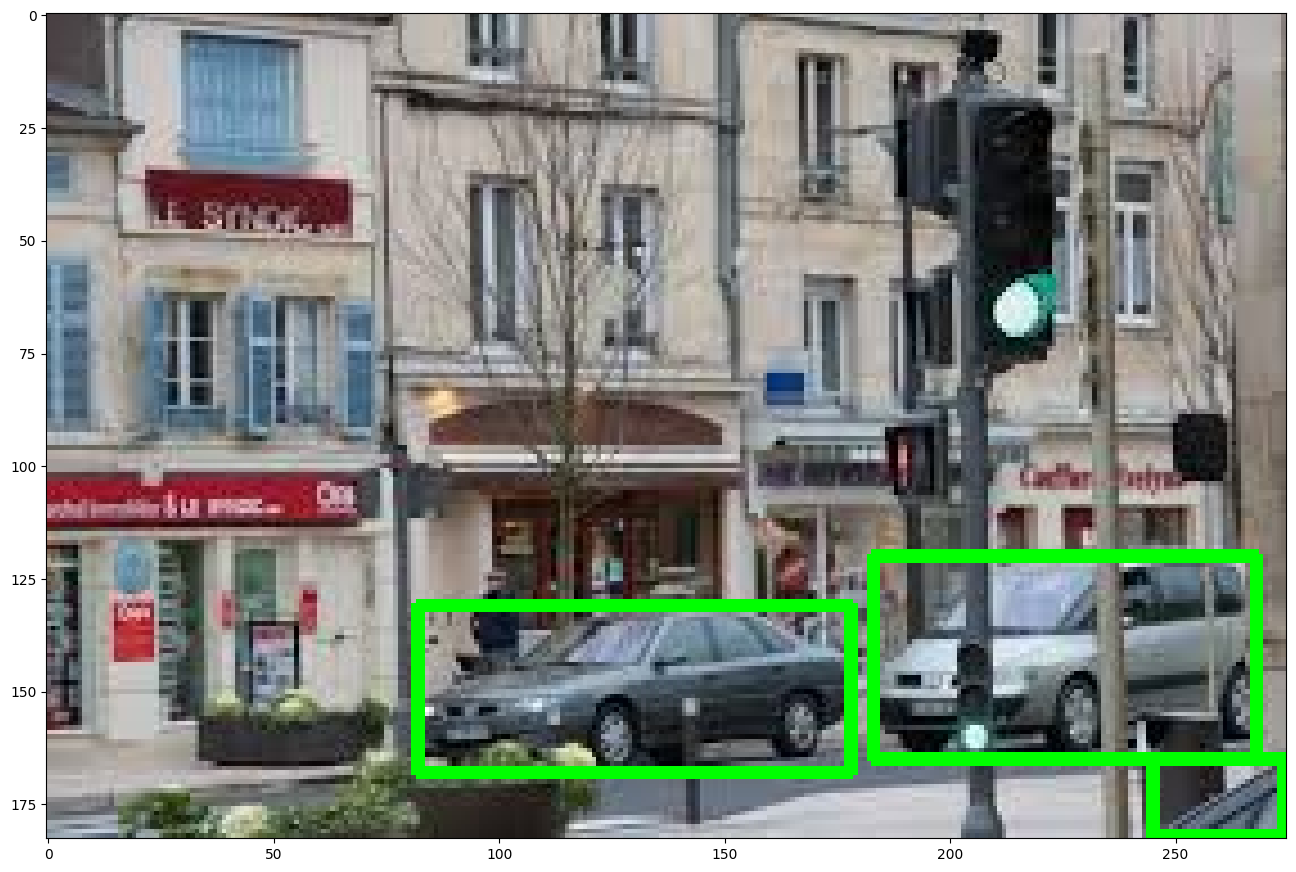

In [11]:
# Setting up for model detection

# Passing test image
frame = cv2.imread(HOME + "/testing.jpeg")
print(HOME + "/test.jpg")
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

detections = [detection for detection in detections if detection[2] == 2]

for detection in detections:
    box = detection[0]
    cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:
!docker rmi $(docker images -f “dangling=true” -q)